In [ ]:
import sys
sys.path.insert(0, 'D:\\PHD\\Research\\NRSR_Tutorial')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Core2dsp import PLOT_Jiayu
from NRSR_Tutorial.dsp import scg_simulate, cal_stft, cal_fft, cal_gabor

  0%|          | 0/1 [00:00<?, ?it/s]D:\PHD\Research\NRSR_Tutorial\dsp.py:1682: NeuroKitWarning: Skipping requested noise frequency  of 100 Hz since it cannot be resolved at  the sampling rate of 100 Hz. Please increase  sampling rate to 1000 Hz or choose  frequencies smaller than or equal to 10.0 Hz.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


hr: 118 rr: 11 sp: 106 dp: 83


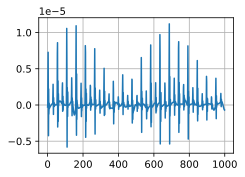

In [2]:
scg_label = scg_simulate(n_echo = 0)
scg, label = scg_label[:1000], scg_label[-6:]
PLOT_Jiayu.plot(scg)

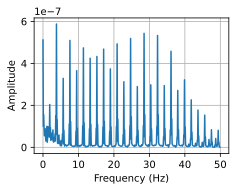

In [3]:
x_fft, y_fft = cal_fft(scg, 100, show=True)

D:\PHD\Research\NRSR_Tutorial\dsp.py:161: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = axes.pcolormesh(time_bins, fftshift(freq_bins), np.abs(gabor_coefficients))


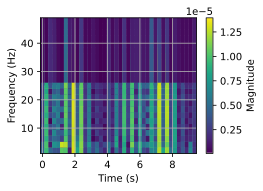

In [4]:
gabor_coeffs, time_bins, freq_bins = cal_gabor(scg, window_size=48, hop_size=24, fs=100, show=True)

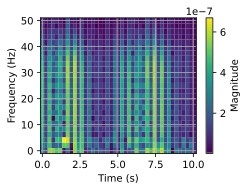

In [5]:
freqs, times, stft_matrix = cal_stft(scg, 100, nperseg=48, show=True)

In [6]:
from NRSR_Tutorial.dsp import time_centroid_width, frequency_centroid_width
sampling_rate = 100

time_centroid, time_width = time_centroid_width(scg, sampling_rate)
frequency_centroid, frequency_width = frequency_centroid_width(scg, sampling_rate)

time_centroid, frequency_centroid

(4.312433826559306, 20.77777921507695)

(0.07291689019684469, 21.681339707579557)

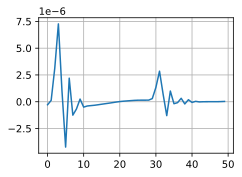

In [7]:
from NRSR_Tutorial.dsp import time_centroid_width, frequency_centroid_width
sampling_rate = 100

scg_template = scg[:int(60*sampling_rate//label[2])]

PLOT_Jiayu.plot(scg_template)

time_centroid, time_width = time_centroid_width(scg_template, sampling_rate)
frequency_centroid, frequency_width = frequency_centroid_width(scg_template, sampling_rate)

time_centroid, frequency_centroid

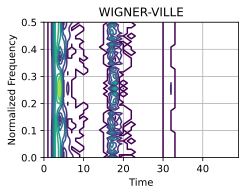

In [8]:
from tftb.processing import WignerVilleDistribution

wvd = WignerVilleDistribution(scg_template)
wvd.run()
wvd.plot(kind='contour')


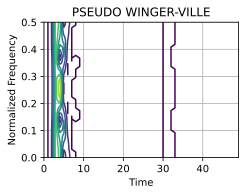

In [9]:
from tftb.processing import PseudoWignerVilleDistribution
pwvd = PseudoWignerVilleDistribution(scg_template)
pwvd.run()
pwvd.plot(kind='contour')